# Projek_UAS

TUGAS:
- Crawling berita dari website dengan 3 kategori
- Melakukan Pre-Processing
- Melakukan Modelling untuk mencari nilai akurasi yang tinggi

Beberapa library yang dibutuhkan

In [5]:
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv

Proses crawling dari website https://www.kompas.com/

In [6]:
def scraping_berita(halaman):
    # Daftar kategori yang dapat diisi custom sesuai kebutuhan
    kategori = ['Health', 'Bola', 'Tekno']

    a = 1

    with open('Kompas.csv', 'w', newline='', encoding='utf-8') as file:
        fieldnames = ['Judul_Artikel', 'Tanggal Publish', 'Content_Artikel', 'Category']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()

        # Looping untuk setiap kategori
        for kategori_terpilih in kategori:
            katakunci = kategori_terpilih

            for page in range(1, halaman + 1):
                url = f'https://indeks.kompas.com/?site={katakunci}&page={page}'
                html = req.get(url).text
                soup = bs(html, 'lxml')
                list_berita = soup.find('div', class_='latest--indeks mt2 clearfix')
                berita_list = list_berita.find_all('div', class_='article__list clearfix')

                for berita in berita_list:
                    link = berita.find('div', class_='article__list__title').find('a', class_='article__link')['href']
                    date = berita.find('div', class_='article__list__info').find('div', class_='article__date').text
                    headline = berita.find('div', class_='article__list__title').find('a', class_='article__link').text

                    if (katakunci == 'Health'):
                      category = 'Health'
                    elif (katakunci == 'Bola'):
                      category = 'Bola'
                    elif (katakunci == 'Tekno'):
                      category = 'Tekno'

                    ge_berita = req.get(link).text
                    sop_berita = bs(ge_berita, 'lxml')
                    content_elem = sop_berita.find_all('div', class_='read__content')
                    content_list = [p.text for elem in content_elem for p in elem.find_all('p')]
                    artikel = '\n'.join(content_list).replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '').replace('\n', ' ').strip()

                    print(f'data berhasil diambil[{a}] > {headline[0:10]}')
                    a += 1

                    writer.writerow({'Judul_Artikel': headline, 'Tanggal Publish': date, 'Content_Artikel': artikel, 'Category': category})

# pemanggilan fungsi dengan jumlah halaman yang di scraping
scraping_berita(18)

data berhasil diambil[1] > Ketahui Pe
data berhasil diambil[2] > Kenali Pen
data berhasil diambil[3] > Awas, Libu
data berhasil diambil[4] > Kenali Apa
data berhasil diambil[5] > 6 Pantanga
data berhasil diambil[6] > Kenapa Ker
data berhasil diambil[7] > 8 Cara Mem
data berhasil diambil[8] > 10 Penyeba
data berhasil diambil[9] > 10 Kelebih
data berhasil diambil[10] > 6 Dampak N
data berhasil diambil[11] > Apakah Min
data berhasil diambil[12] > Mengenal B
data berhasil diambil[13] > Kenapa Ora
data berhasil diambil[14] > 8 Obat Sak
data berhasil diambil[15] > 16 Tanda-t
data berhasil diambil[16] >  Mengenal 
data berhasil diambil[17] > Kenapa Per
data berhasil diambil[18] > 5 Penyebab
data berhasil diambil[19] > Apakah Par
data berhasil diambil[20] > Penyebab G
data berhasil diambil[21] > Tingkat Fa
data berhasil diambil[22] > Bagaimana 
data berhasil diambil[23] > 13 Cara Me
data berhasil diambil[24] > Penyebab C
data berhasil diambil[25] > Kemenkes S
data berhasil diambil[26] > Peran 

Load data

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
data = pd.read_csv('/content/Kompas.csv')
data

Judul_Artikel        Tanggal Publish  \
0    Ketahui Pengaruh Usia terhadap Sistem Reproduk...  09/12/2023, 20:00 WIB   
1    Kenali Pentingnya Manfaat Asam Folat untuk Ceg...  09/12/2023, 16:01 WIB   
2    Awas, Libur Panjang Tingkatkan Risiko Holiday ...  09/12/2023, 14:30 WIB   
3    Kenali Apa Itu Bakteri Treponema Pallidum, Kum...  09/12/2023, 12:00 WIB   
4    6 Pantangan Biang Keringat dan Perawatannya ya...  09/12/2023, 10:01 WIB   
..                                                 ...                    ...   
805  Artificial Intelligence: Pengertian, Jenis, Co...  23/11/2023, 16:15 WIB   
806  6 Ciri-ciri Laptop Terkena Virus, Begini Cara ...  23/11/2023, 16:02 WIB   
807  Telkomsel Ventures Bakal Gelar Pendanaan Lagi,...  23/11/2023, 15:20 WIB   
808  Serupa tapi Tak Sama, Ini Bedanya Kabel USB Mu...  23/11/2023, 14:42 WIB   
809  HP Lipat Tecno Phantom V Flip 5G Dijual Rp 9 J...  23/11/2023, 14:02 WIB   

                                       Content_Artikel Category  
0    KOMPAS.com - Seiring bertambahnya usia, tubuh ...   Health  
1    KOMPAS.com - Pemenuhan zat gizi asam folat pen...   Health  
2    KOMPAS.com - Libur natal dan akhir tahun seben...   Health  
3    KOMPAS.com - Sifilis termasuk ke dalam salah s...   Health  
4    KOMPAS.com - Biang keringat atau keringat bunt...   Health  
..                                                 ...      ...  
805  KOMPAS.com - Artificial Intelligence (AI) atau...    Tekno  
806  KOMPAS.com - Beberapa pengguna komputer atau l...    Tekno  
807  JAKARTA, KOMPAS.com - Perusahaan permodalan Te...    Tekno  
808  KOMPAS.com - Jika Anda mengetikkan kata kunci ...    Tekno  
809  KOMPAS.com - Vendor smartphone Tecno mengumumk...    Tekno  

[810 rows x 4 columns]

In [23]:
len(data)

810

In [24]:
# Menggunakan groupby untuk mengelompokkan berdasarkan kategori dan menghitung jumlah data
jumlah_data_per_kategori = data.groupby('Category').size()

# Menampilkan hasil
for Category, jumlah_data in jumlah_data_per_kategori.items():
    print(f"Jumlah data untuk {Category}:{jumlah_data}")

Jumlah data untuk Bola:270
Jumlah data untuk Health:270
Jumlah data untuk Tekno:270


In [12]:
#data.to_csv('HasilKompas.csv', index=False)

Cleaning
- Pada konteks pemrosesan data atau pemrosesan teks, "cleaning" merujuk pada proses membersihkan data dari informasi yang tidak diinginkan, menghilangkan noise, atau menangani nilai yang tidak valid. Proses pembersihan ini bertujuan untuk meningkatkan kualitas data, membuatnya lebih siap untuk analisis atau pengolahan lebih lanjut.

In [32]:
import re
data['clean_content'] = data['Content_Artikel'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()
data

Judul_Artikel        Tanggal Publish  \
0    Ketahui Pengaruh Usia terhadap Sistem Reproduk...  09/12/2023, 20:00 WIB   
1    Kenali Pentingnya Manfaat Asam Folat untuk Ceg...  09/12/2023, 16:01 WIB   
2    Awas, Libur Panjang Tingkatkan Risiko Holiday ...  09/12/2023, 14:30 WIB   
3    Kenali Apa Itu Bakteri Treponema Pallidum, Kum...  09/12/2023, 12:00 WIB   
4    6 Pantangan Biang Keringat dan Perawatannya ya...  09/12/2023, 10:01 WIB   
..                                                 ...                    ...   
805  Artificial Intelligence: Pengertian, Jenis, Co...  23/11/2023, 16:15 WIB   
806  6 Ciri-ciri Laptop Terkena Virus, Begini Cara ...  23/11/2023, 16:02 WIB   
807  Telkomsel Ventures Bakal Gelar Pendanaan Lagi,...  23/11/2023, 15:20 WIB   
808  Serupa tapi Tak Sama, Ini Bedanya Kabel USB Mu...  23/11/2023, 14:42 WIB   
809  HP Lipat Tecno Phantom V Flip 5G Dijual Rp 9 J...  23/11/2023, 14:02 WIB   

                                       Content_Artikel Category  \
0    KOMPAS.com - Seiring bertambahnya usia, tubuh ...   Health   
1    KOMPAS.com - Pemenuhan zat gizi asam folat pen...   Health   
2    KOMPAS.com - Libur natal dan akhir tahun seben...   Health   
3    KOMPAS.com - Sifilis termasuk ke dalam salah s...   Health   
4    KOMPAS.com - Biang keringat atau keringat bunt...   Health   
..                                                 ...      ...   
805  KOMPAS.com - Artificial Intelligence (AI) atau...    Tekno   
806  KOMPAS.com - Beberapa pengguna komputer atau l...    Tekno   
807  JAKARTA, KOMPAS.com - Perusahaan permodalan Te...    Tekno   
808  KOMPAS.com - Jika Anda mengetikkan kata kunci ...    Tekno   
809  KOMPAS.com - Vendor smartphone Tecno mengumumk...    Tekno   

                                         clean_content  
0    kompas.com  seiring bertambahnya usia, tubuh k...  
1    kompas.com  pemenuhan zat gizi asam folat pent...  
2    kompas.com  libur natal dan akhir tahun sebent...  
3    kompas.com  sifilis termasuk ke dalam salah sa...  
4    kompas.com  biang keringat atau keringat bunte...  
..                                                 ...  
805  kompas.com  artificial intelligence ai atau ke...  
806  kompas.com  beberapa pengguna komputer atau la...  
807  jakarta, kompas.com  perusahaan permodalan tel...  
808  kompas.com  jika anda mengetikkan kata kunci k...  
809  kompas.com  vendor smartphone tecno mengumumka...  

[810 rows x 5 columns]

Tokenizing
- Tokenisasi merupakan langkah pemecahan teks atau data teks menjadi komponen-komponen yang lebih kecil, yang dikenal sebagai token. Token dapat berupa unit dasar yang terdiri dari satu atau beberapa karakter yang memiliki signifikansi. Proses tokenisasi secara luas digunakan dalam pemrosesan teks dan analisis bahasa alami. Pada intinya, tokenisasi membantu mengubah teks menjadi serangkaian elemen yang dapat diolah lebih lanjut.

Library yang digunakan

In [33]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# Pastikan setiap nilai di kolom 'clean_content' adalah string
data['clean_content'] = data['clean_content'].astype(str)

# Terapkan sent_tokenize setelah memastikan bahwa semua nilainya adalah string
data["tokenizing"] = data['clean_content'].apply(sent_tokenize)
data

Judul_Artikel        Tanggal Publish  \
0    Ketahui Pengaruh Usia terhadap Sistem Reproduk...  09/12/2023, 20:00 WIB   
1    Kenali Pentingnya Manfaat Asam Folat untuk Ceg...  09/12/2023, 16:01 WIB   
2    Awas, Libur Panjang Tingkatkan Risiko Holiday ...  09/12/2023, 14:30 WIB   
3    Kenali Apa Itu Bakteri Treponema Pallidum, Kum...  09/12/2023, 12:00 WIB   
4    6 Pantangan Biang Keringat dan Perawatannya ya...  09/12/2023, 10:01 WIB   
..                                                 ...                    ...   
805  Artificial Intelligence: Pengertian, Jenis, Co...  23/11/2023, 16:15 WIB   
806  6 Ciri-ciri Laptop Terkena Virus, Begini Cara ...  23/11/2023, 16:02 WIB   
807  Telkomsel Ventures Bakal Gelar Pendanaan Lagi,...  23/11/2023, 15:20 WIB   
808  Serupa tapi Tak Sama, Ini Bedanya Kabel USB Mu...  23/11/2023, 14:42 WIB   
809  HP Lipat Tecno Phantom V Flip 5G Dijual Rp 9 J...  23/11/2023, 14:02 WIB   

                                       Content_Artikel Category  \
0    KOMPAS.com - Seiring bertambahnya usia, tubuh ...   Health   
1    KOMPAS.com - Pemenuhan zat gizi asam folat pen...   Health   
2    KOMPAS.com - Libur natal dan akhir tahun seben...   Health   
3    KOMPAS.com - Sifilis termasuk ke dalam salah s...   Health   
4    KOMPAS.com - Biang keringat atau keringat bunt...   Health   
..                                                 ...      ...   
805  KOMPAS.com - Artificial Intelligence (AI) atau...    Tekno   
806  KOMPAS.com - Beberapa pengguna komputer atau l...    Tekno   
807  JAKARTA, KOMPAS.com - Perusahaan permodalan Te...    Tekno   
808  KOMPAS.com - Jika Anda mengetikkan kata kunci ...    Tekno   
809  KOMPAS.com - Vendor smartphone Tecno mengumumk...    Tekno   

                                         clean_content  \
0    kompas.com  seiring bertambahnya usia, tubuh k...   
1    kompas.com  pemenuhan zat gizi asam folat pent...   
2    kompas.com  libur natal dan akhir tahun sebent...   
3    kompas.com  sifilis termasuk ke dalam salah sa...   
4    kompas.com  biang keringat atau keringat bunte...   
..                                                 ...   
805  kompas.com  artificial intelligence ai atau ke...   
806  kompas.com  beberapa pengguna komputer atau la...   
807  jakarta, kompas.com  perusahaan permodalan tel...   
808  kompas.com  jika anda mengetikkan kata kunci k...   
809  kompas.com  vendor smartphone tecno mengumumka...   

                                            tokenizing  
0    [kompas.com  seiring bertambahnya usia, tubuh ...  
1    [kompas.com  pemenuhan zat gizi asam folat pen...  
2    [kompas.com  libur natal dan akhir tahun seben...  
3    [kompas.com  sifilis termasuk ke dalam salah s...  
4    [kompas.com  biang keringat atau keringat bunt...  
..                                                 ...  
805  [kompas.com  artificial intelligence ai atau k...  
806  [kompas.com  beberapa pengguna komputer atau l...  
807  [jakarta, kompas.com  perusahaan permodalan te...  
808  [kompas.com  jika anda mengetikkan kata kunci ...  
809  [kompas.com  vendor smartphone tecno mengumumk...  

[810 rows x 6 columns]

TF-IDF
- Mengukur seberapa panting suatu kata dalam dokumen berita tersebut

In [37]:
# Inisialisasi TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfidf_results = []
set_len_doc = data['tokenizing'][:]
for i in range(len(set_len_doc)): #perulangan setiap artikel/dokumen

  tfidf_vectorizer = TfidfVectorizer()  #inisialisasi tfidf
  tfidf_matrix = tfidf_vectorizer.fit_transform(data['tokenizing'][i]) #menjadikan tfidf setiap dokumen
  tfidf_results.append(tfidf_matrix) #memasukkan hasil matrix tfidf ke tfidf_results

In [39]:
# Menampilkan data TFIDF
for idoc in range(len(tfidf_results)):
  print(f'========== Document ke-{idoc} ==========')

  arr_tfidf_results = tfidf_results[idoc].toarray() #menjadikan hasil tfidf yang format sparesematrix menjadi array

  index = 0
  for hasils in arr_tfidf_results:
    print(f'Hasil Tfidf Kalimat ke-{index+1} = {list(hasils)}')
    index+=1
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

Cossines Similarity
- "Closeness similarity" atau "kemiripan kedekatan" merupakan suatu metrik yang digunakan untuk mengevaluasi sejauh mana dua objek atau entitas serupa. Istilah ini sering digunakan dalam analisis data, pemrosesan teks, dan bidang lain di mana perbandingan atau pengukuran kemiripan antara dua entitas menjadi penting.

Library yang digunakan

In [40]:
# Import Library
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.shortest_paths import weighted

In [41]:
cos_sim_result = [] #untuk menyimpan hasil cosine sim akhir
graf_result = [] #untuk menyimpan hasil graf akhir
treshold = 0.08 #inisialisasi treshold

for i_doc in range(len(tfidf_results)):
  # print(f'========= Document ke-{i_doc} ==========')

  cos_sim_now = []
  graf_now = nx.DiGraph()
  cos_sim = cosine_similarity(tfidf_results[i_doc]) #menjadikan tfidf ke cosine

  for i_hasil in range(len(cos_sim)): #inisialisasi indeks awal perulangan dari setiap hasil cosine
    arr_cosim = []

    for j_hasil in range(i_hasil+1,len(cos_sim)): #inisialisasi indeks kedua perulangan dari setiap hasil cosine
      if cos_sim[i_hasil][j_hasil] > treshold: #cek apakah cosim dari kalimat 1 dan 2 lebih dari treshold?
        # print(f'Similairty kalimat ke - {i_hasil} : {j_hasil} = {cos_sim[i_hasil][j_hasil]}')

        arr_cosim.append([i_hasil,j_hasil,cos_sim[i_hasil][j_hasil]]) #menyimpan nilai indeks awal, indeks awal+1, hasil cosim
        graf_now.add_edge(i_hasil,j_hasil,weight=cos_sim[i_hasil][j_hasil]) #menyimpan nilai indeks awal, indeks awal+1, bobot=hasil cosim

    cos_sim_now.append(arr_cosim)
    # graf_now.append(graf_current)
  cos_sim_result.append(cos_sim_now)
  graf_result.append(graf_now)
  # print('\n')

In [42]:
# menampilkan hasil cosine simmilarity
for i in range(len(cos_sim_result)):
  print(f'============= Document ke - {i} ==============')
  for j in range(len(cos_sim_result[i])):
    for idx1,idx2,hasil in cos_sim_result[i][j]:
      print(f'Cosine Similarity Kalimat {idx1} : {idx2} = {hasil}')
  print('\n')

Output streaming akan dipotong hingga 5000 baris terakhir.
Cosine Similarity Kalimat 0 : 26 = 0.09434088129451806
Cosine Similarity Kalimat 0 : 28 = 0.12565385989595593
Cosine Similarity Kalimat 1 : 2 = 0.19364973116683548
Cosine Similarity Kalimat 1 : 3 = 0.2563564498331758
Cosine Similarity Kalimat 1 : 4 = 0.30189424109827456
Cosine Similarity Kalimat 1 : 6 = 0.12183799681864456
Cosine Similarity Kalimat 1 : 7 = 0.2312028561730255
Cosine Similarity Kalimat 1 : 9 = 0.0989431583949334
Cosine Similarity Kalimat 1 : 10 = 0.1997314722918677
Cosine Similarity Kalimat 1 : 13 = 0.18665033513410106
Cosine Similarity Kalimat 1 : 16 = 0.18069609089651412
Cosine Similarity Kalimat 1 : 17 = 0.1998749998669692
Cosine Similarity Kalimat 1 : 18 = 0.10514478926576465
Cosine Similarity Kalimat 1 : 20 = 0.16762228892637232
Cosine Similarity Kalimat 1 : 21 = 0.10416643135312925
Cosine Similarity Kalimat 1 : 22 = 0.09537917606746246
Cosine Similarity Kalimat 1 : 23 = 0.47745074941268617
Cosine Similarity

Closenes Centrality
- "Closeness centrality" atau "kedekatan sentralitas" merupakan suatu metrik sentralitas dalam jaringan yang menilai sejauh mana suatu simpul berdekatan dengan simpul-simpul lainnya dalam jaringan. Pengukuran ini memberikan gambaran tentang seberapa efisien atau cepat suatu simpul dapat dijangkau oleh simpul-simpul lain di dalam jaringan.

In [43]:
# Cuma cek Hitung closeness centrality pada index 0
closeness_centrality = nx.closeness_centrality(graf_result[0])
closeness_centrality

{0: 0.0,
 1: 0.07692307692307693,
 2: 0.15384615384615385,
 3: 0.17307692307692307,
 4: 0.24615384615384617,
 5: 0.32051282051282054,
 6: 0.34615384615384615,
 9: 0.6230769230769231,
 7: 0.4188034188034188,
 12: 0.5475113122171946,
 10: 0.5128205128205128,
 11: 0.4048582995951417,
 8: 0.3282051282051282,
 13: 0.46153846153846156}

In [44]:
for i in range(len(graf_result)):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  # pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  # labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # # Menentukan ukuran canvas
  # plt.figure(figsize=(30, 20))

  # # Menggambar graf dengan ukuran canvas yang diperbesar
  # nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  # nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  # # plt.show()


  print('\n')

Output streaming akan dipotong hingga 5000 baris terakhir.
Closenes Centrality Node 7 = 0.20571428571428568
Closenes Centrality Node 9 = 0.29454545454545455
Closenes Centrality Node 15 = 0.29391304347826086
Closenes Centrality Node 18 = 0.3025
Closenes Centrality Node 23 = 0.5925925925925926
Closenes Centrality Node 24 = 0.5188235294117647
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 8 = 0.19692307692307695
Closenes Centrality Node 12 = 0.04
Closenes Centrality Node 19 = 0.42857142857142855
Closenes Centrality Node 3 = 0.05333333333333333
Closenes Centrality Node 6 = 0.128
Closenes Centrality Node 10 = 0.25
Closenes Centrality Node 22 = 0.35578947368421054
Closenes Centrality Node 25 = 0.06
Closenes Centrality Node 4 = 0.0
Closenes Centrality Node 13 = 0.30315789473684207
Closenes Centrality Node 16 = 0.34086956521739137
Closenes Centrality Node 14 = 0.14
Closenes Centrality Node 11 = 0.17925925925925926
Closenes Centrality Node 17 = 0.28
Closenes Centrality Node 21 = 0.38

Visualisasi graf

========= document ke-0 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.07692307692307693
Closenes Centrality Node 2 = 0.15384615384615385
Closenes Centrality Node 3 = 0.17307692307692307
Closenes Centrality Node 4 = 0.24615384615384617
Closenes Centrality Node 5 = 0.32051282051282054
Closenes Centrality Node 6 = 0.34615384615384615
Closenes Centrality Node 9 = 0.6230769230769231
Closenes Centrality Node 7 = 0.4188034188034188
Closenes Centrality Node 12 = 0.5475113122171946
Closenes Centrality Node 10 = 0.5128205128205128
Closenes Centrality Node 11 = 0.4048582995951417
Closenes Centrality Node 8 = 0.3282051282051282
Closenes Centrality Node 13 = 0.46153846153846156


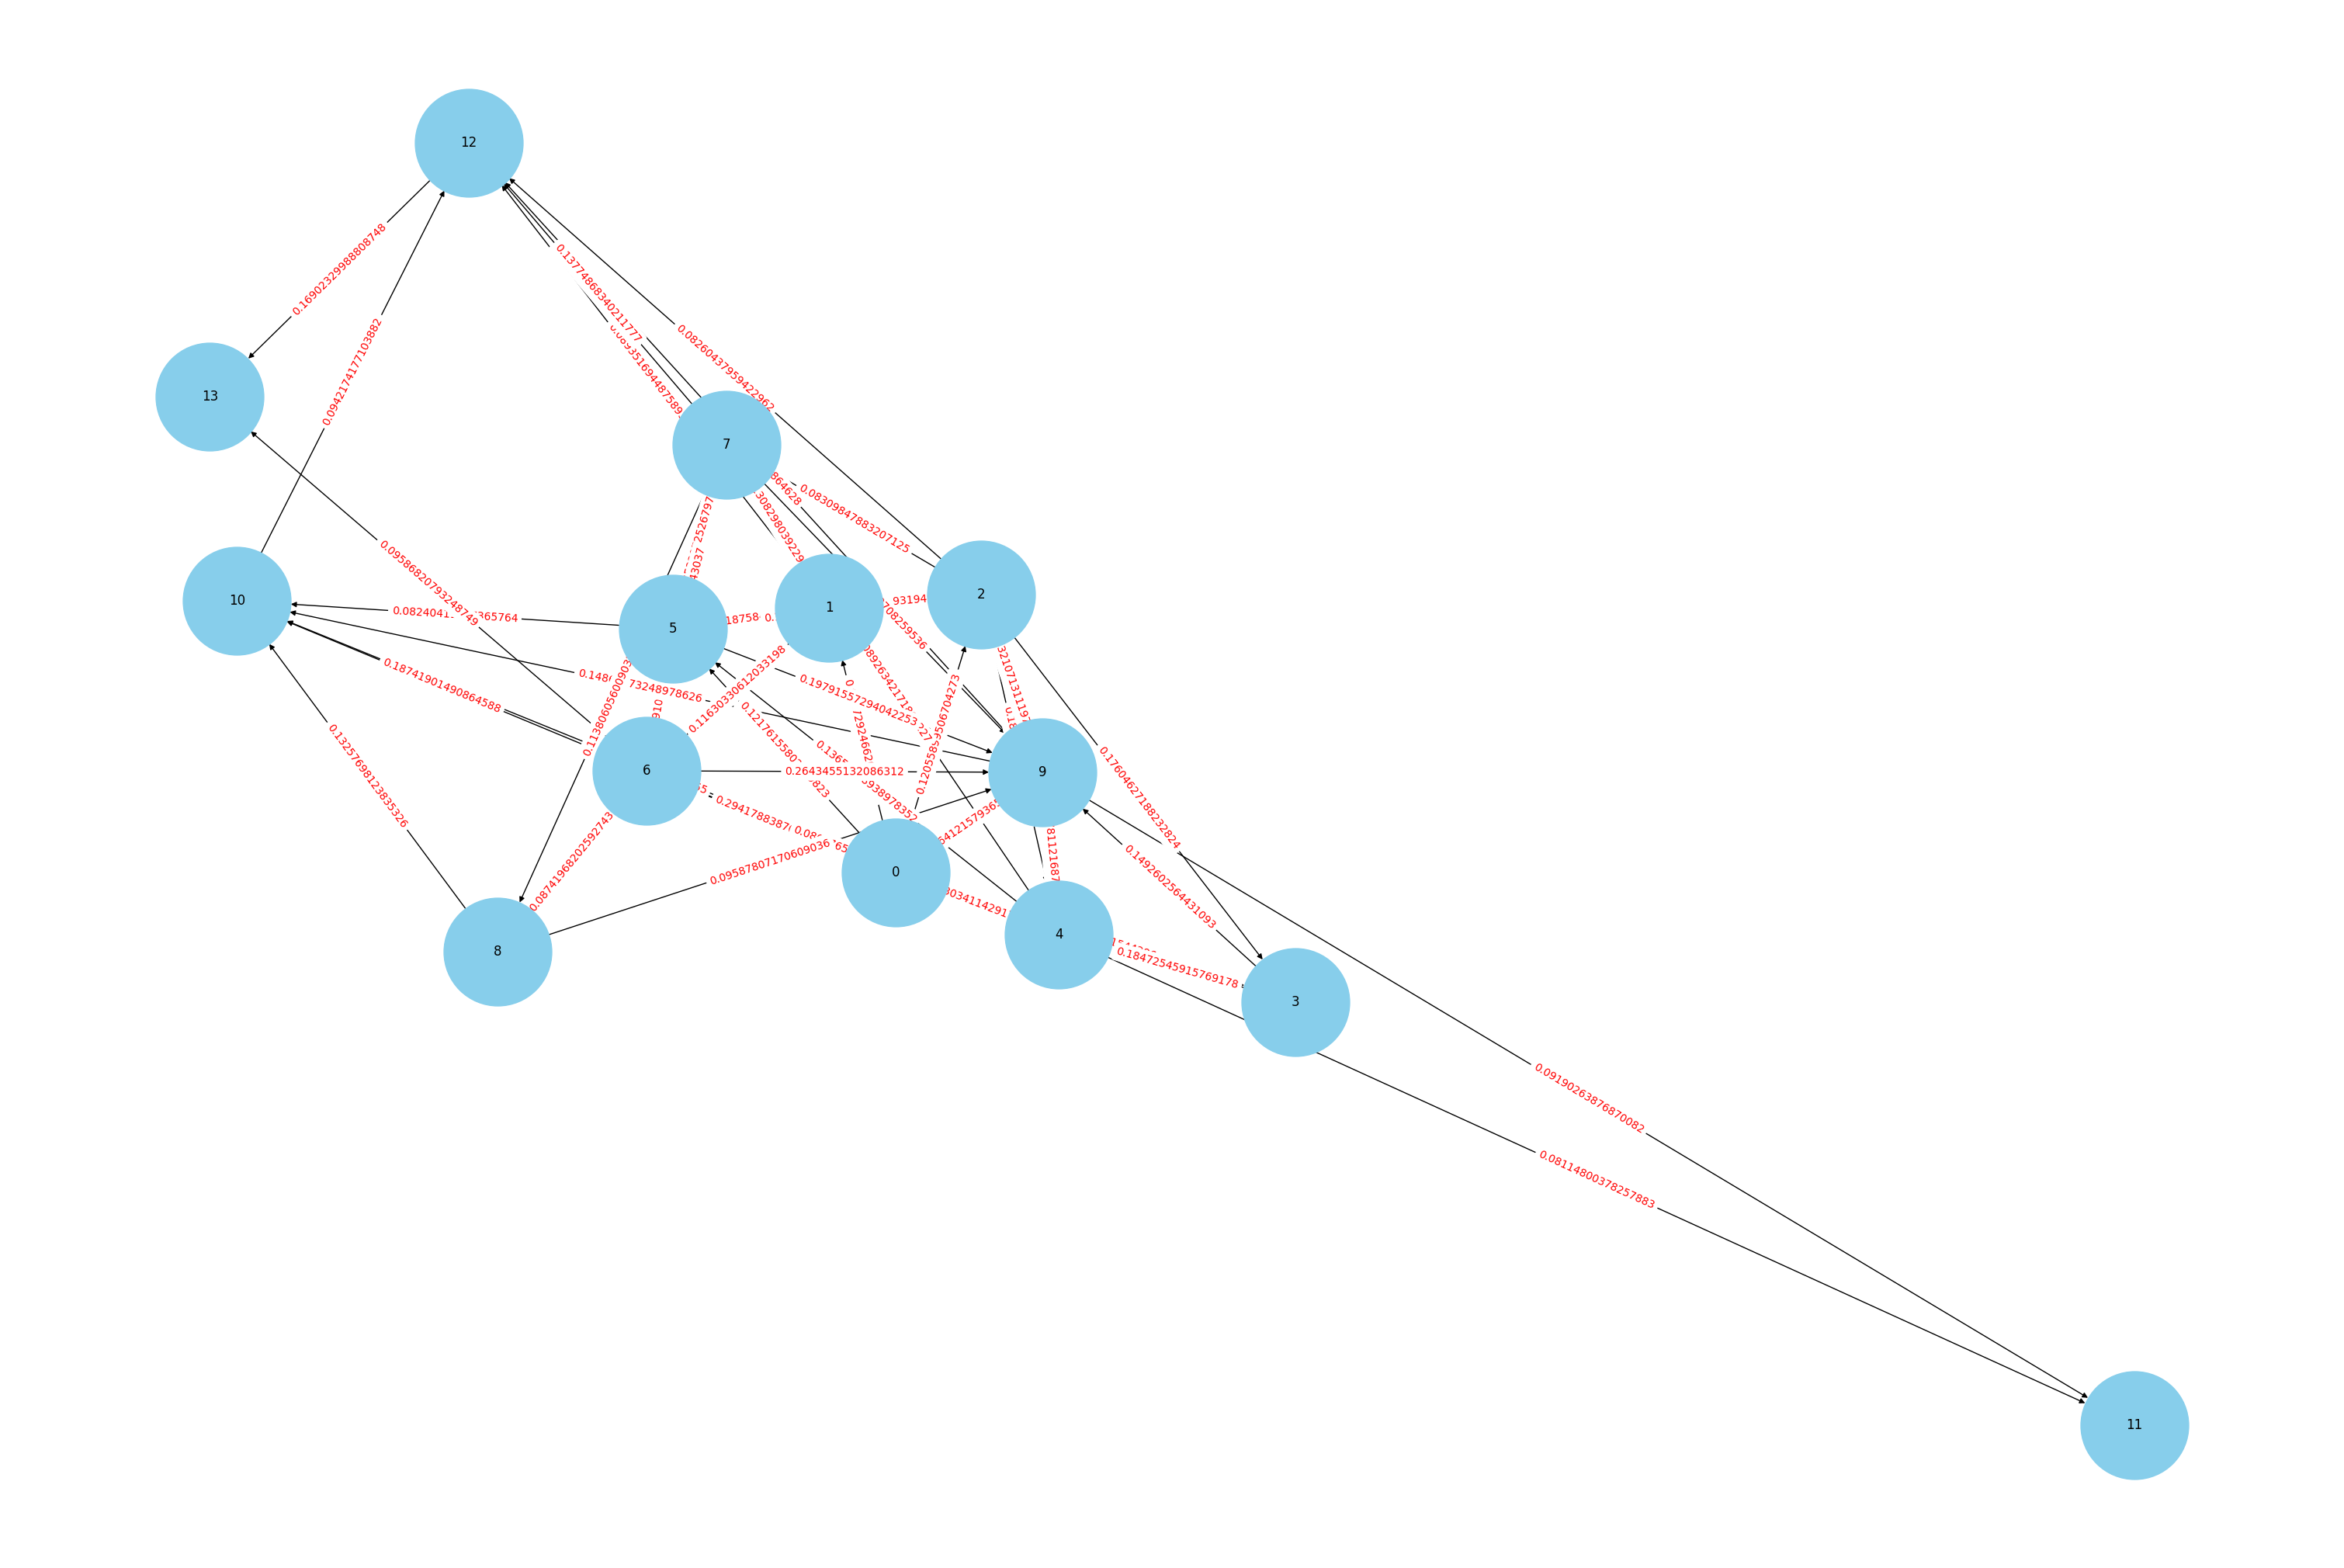



========= document ke-1 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 3 = 0.10526315789473684
Closenes Centrality Node 4 = 0.11842105263157894
Closenes Centrality Node 6 = 0.12030075187969924
Closenes Centrality Node 7 = 0.15789473684210525
Closenes Centrality Node 8 = 0.05263157894736842
Closenes Centrality Node 9 = 0.15789473684210525
Closenes Centrality Node 10 = 0.2807017543859649
Closenes Centrality Node 12 = 0.12030075187969924
Closenes Centrality Node 14 = 0.2664473684210526
Closenes Centrality Node 15 = 0.2706766917293233
Closenes Centrality Node 16 = 0.4263157894736842
Closenes Centrality Node 17 = 0.4245614035087719
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 11 = 0.1644736842105263
Closenes Centrality Node 5 = 0.10526315789473684
Closenes Centrality Node 13 = 0.1894736842105263
Closenes Centrality Node 18 = 0.3684210526315789
Closenes Centrality Node 19 = 0.3557168784029038


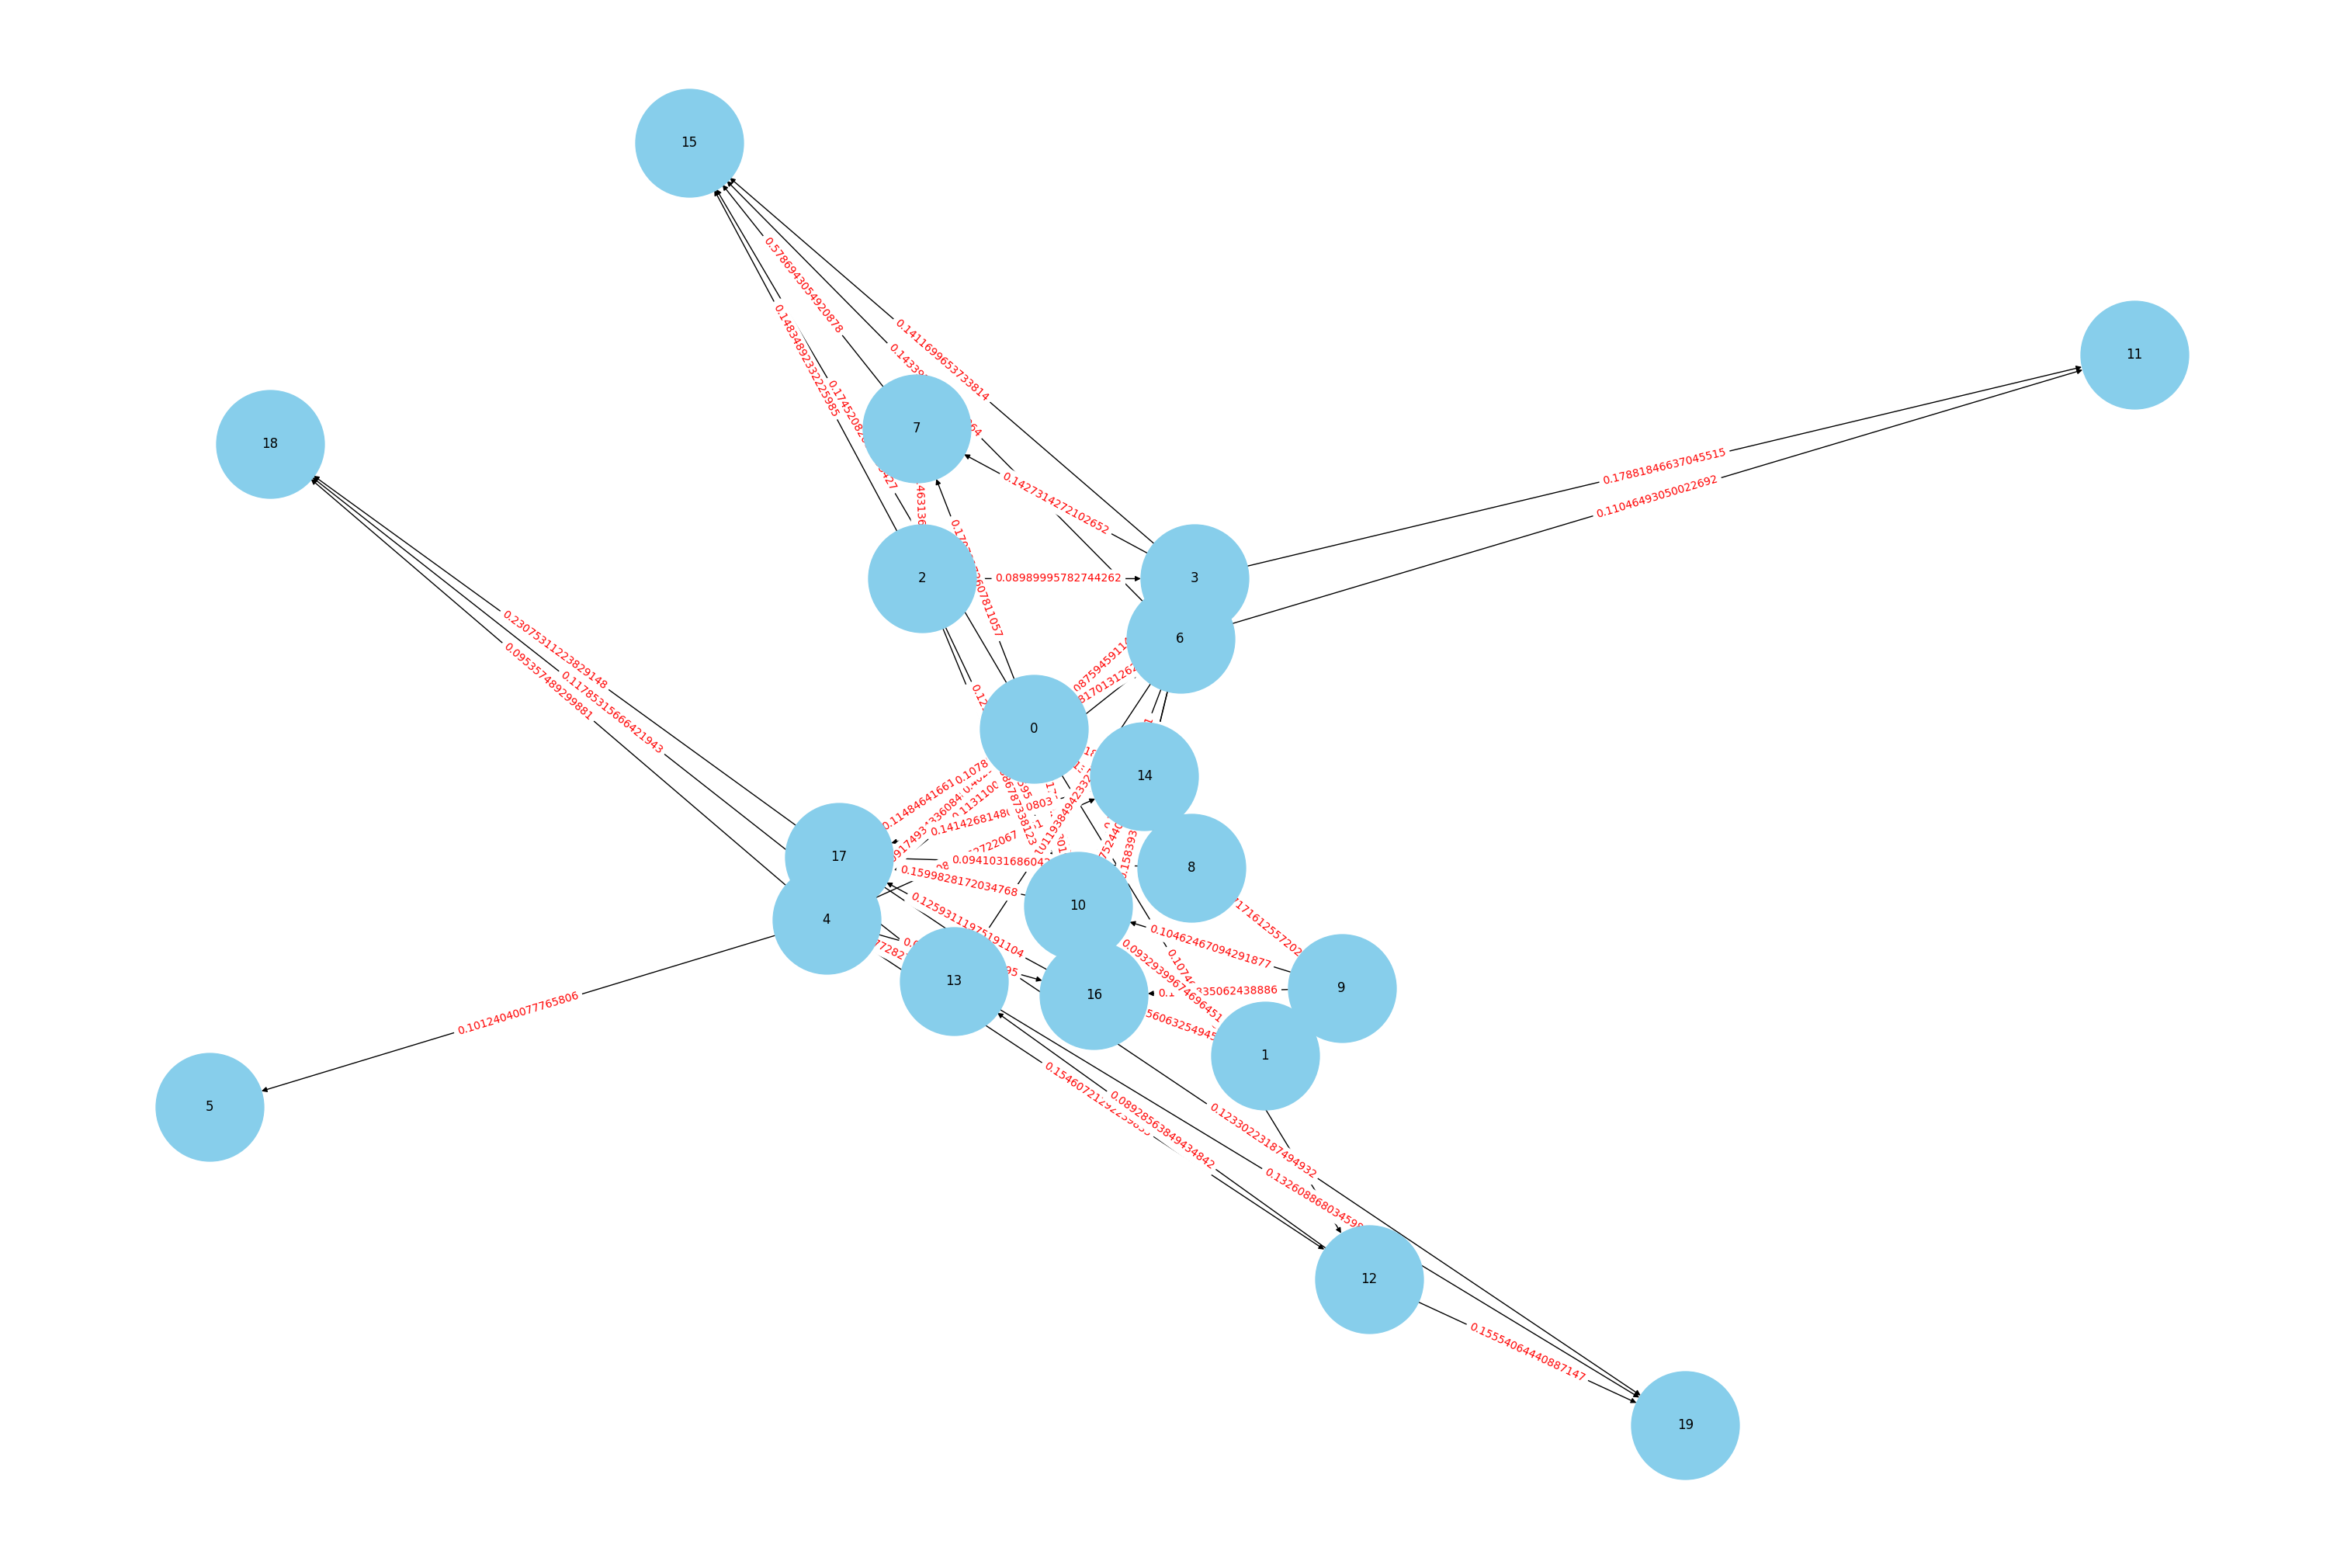



========= document ke-2 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 10 = 0.17647058823529413
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 4 = 0.1323529411764706
Closenes Centrality Node 16 = 0.5294117647058824
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 3 = 0.058823529411764705
Closenes Centrality Node 5 = 0.18823529411764706
Closenes Centrality Node 8 = 0.18823529411764706
Closenes Centrality Node 11 = 0.3137254901960784
Closenes Centrality Node 12 = 0.3176470588235294
Closenes Centrality Node 13 = 0.3970588235294118
Closenes Centrality Node 14 = 0.4982698961937717
Closenes Centrality Node 15 = 0.3550420168067227
Closenes Centrality Node 6 = 0.16339869281045752
Closenes Centrality Node 9 = 0.1568627450980392
Closenes Centrality Node 7 = 0.14705882352941177
Closenes Centrality Node 17 = 0.48576850094876656


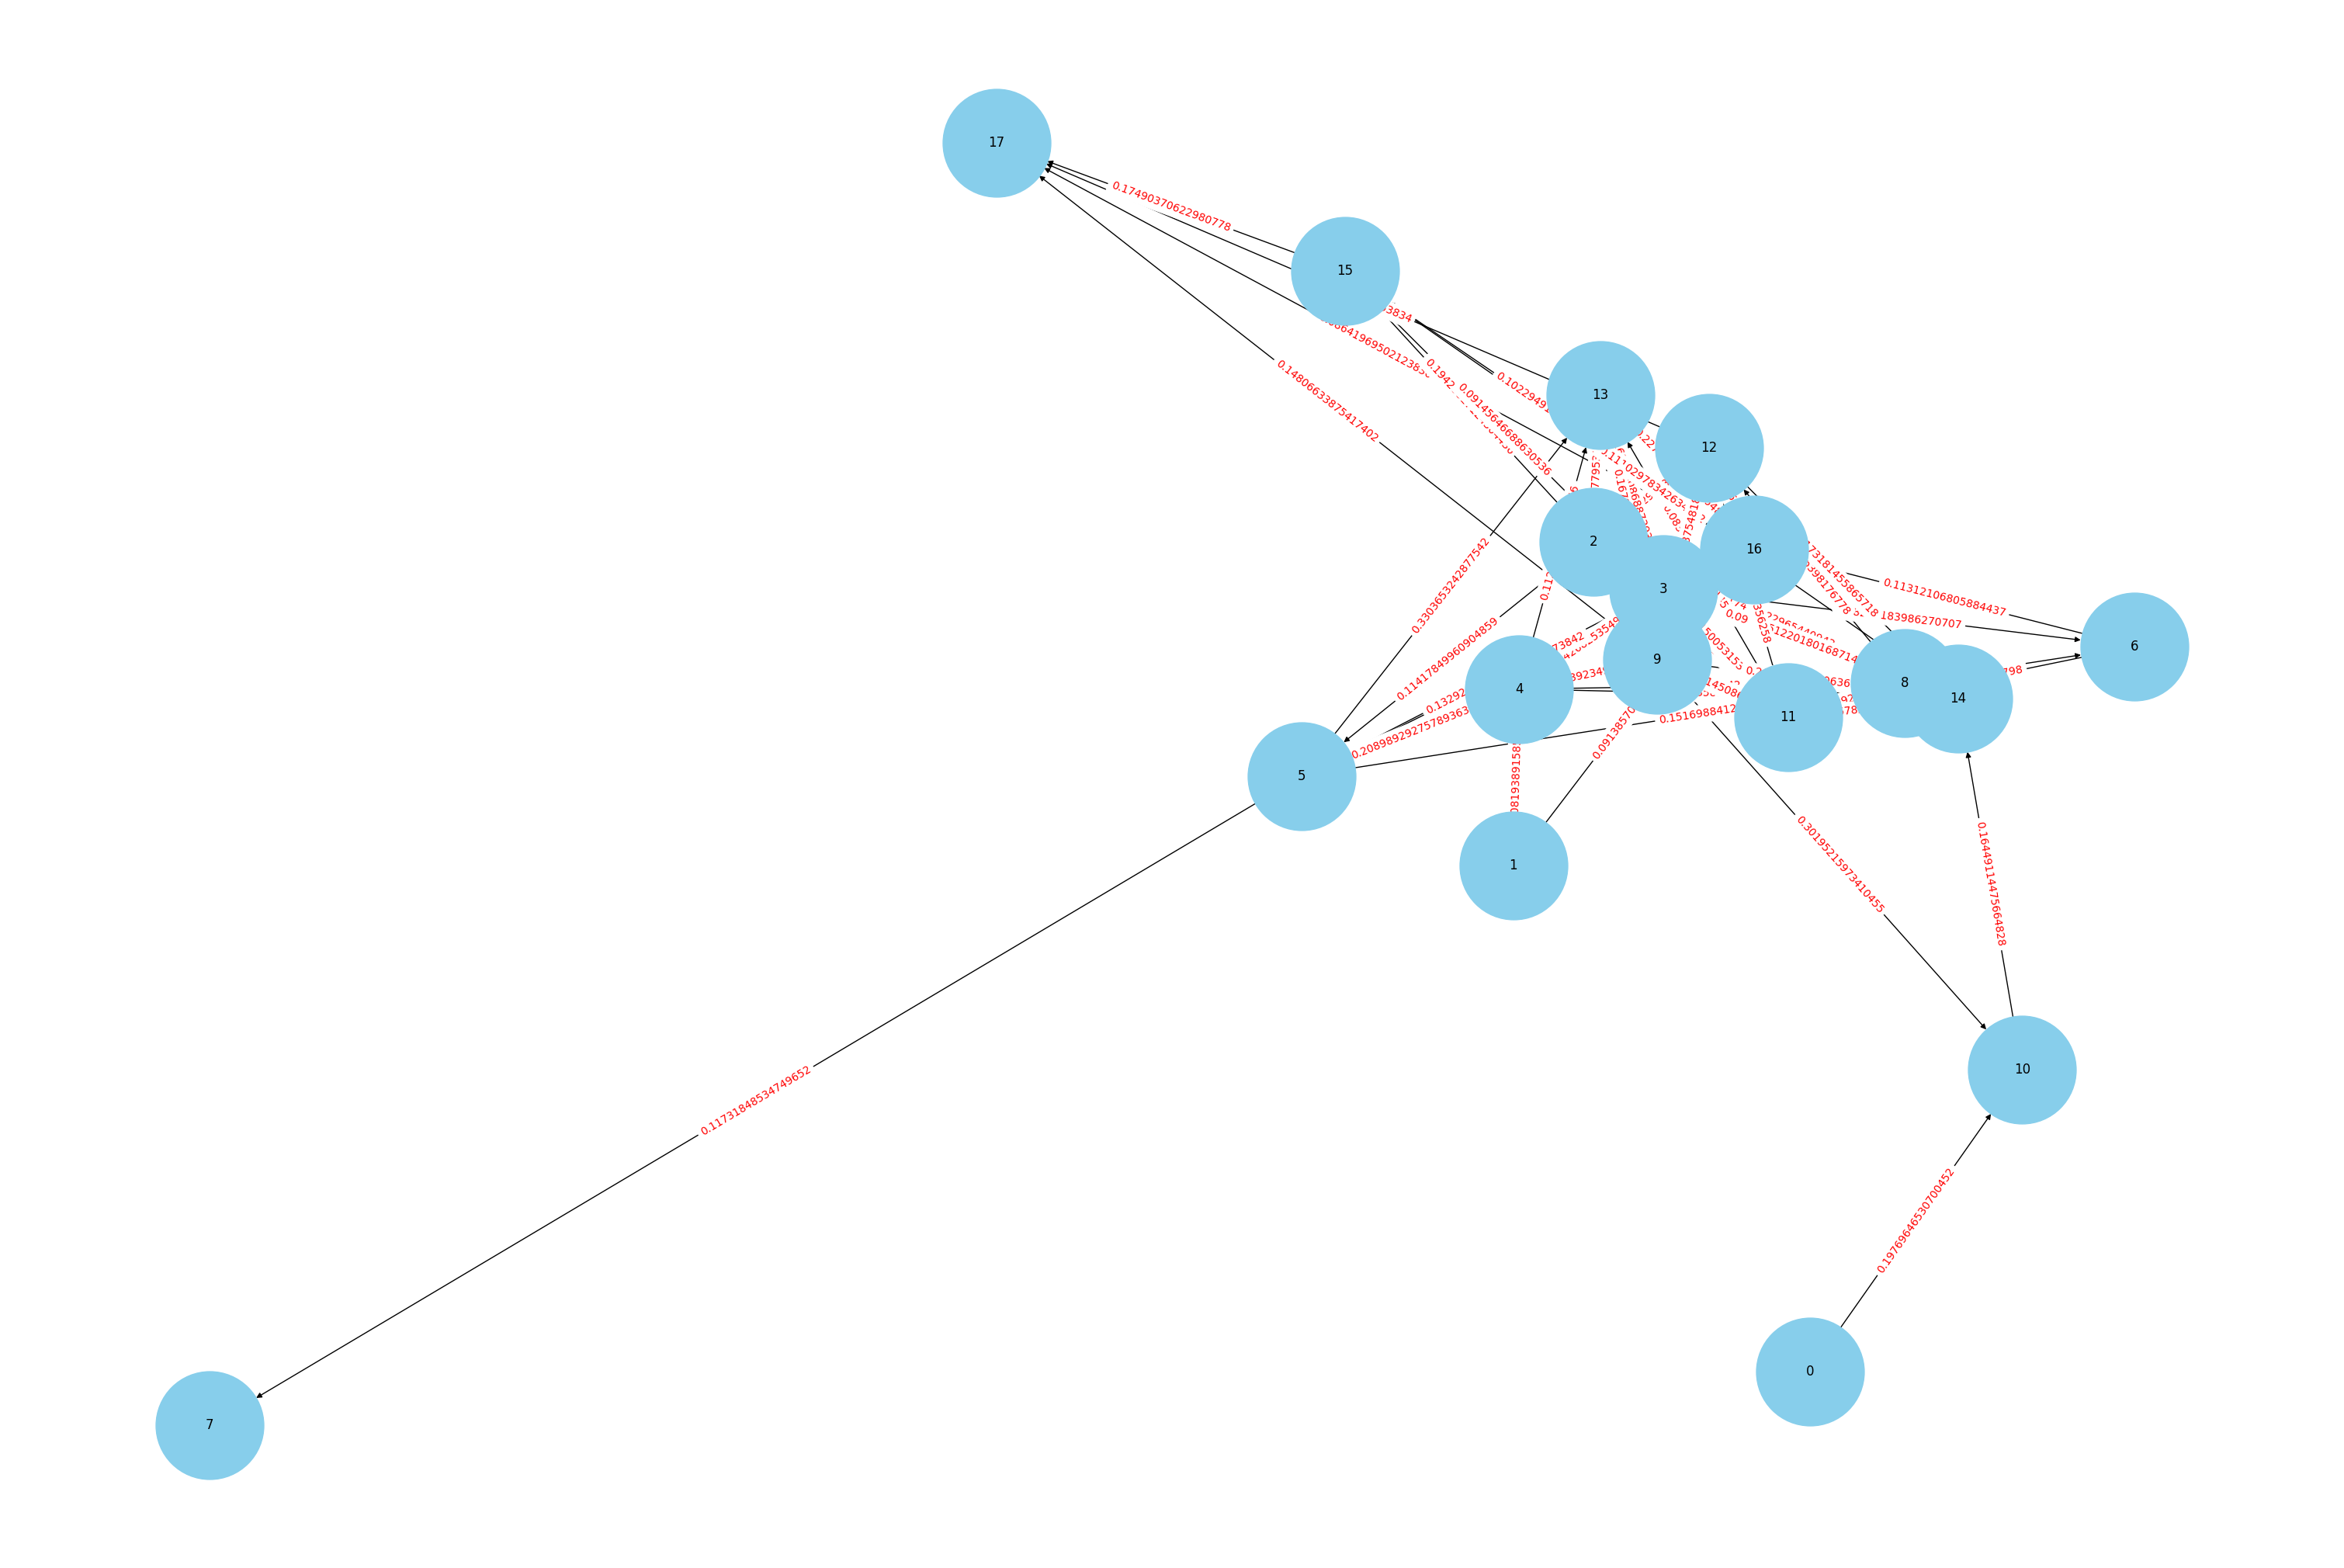



========= document ke-3 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 7 = 0.1607142857142857
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 3 = 0.07142857142857142
Closenes Centrality Node 4 = 0.07142857142857142
Closenes Centrality Node 5 = 0.21428571428571427
Closenes Centrality Node 6 = 0.35714285714285715
Closenes Centrality Node 8 = 0.3214285714285714
Closenes Centrality Node 9 = 0.19047619047619047
Closenes Centrality Node 10 = 0.5
Closenes Centrality Node 12 = 0.45714285714285713
Closenes Centrality Node 14 = 0.6050420168067226
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 11 = 0.32653061224489793
Closenes Centrality Node 13 = 0.5401785714285714


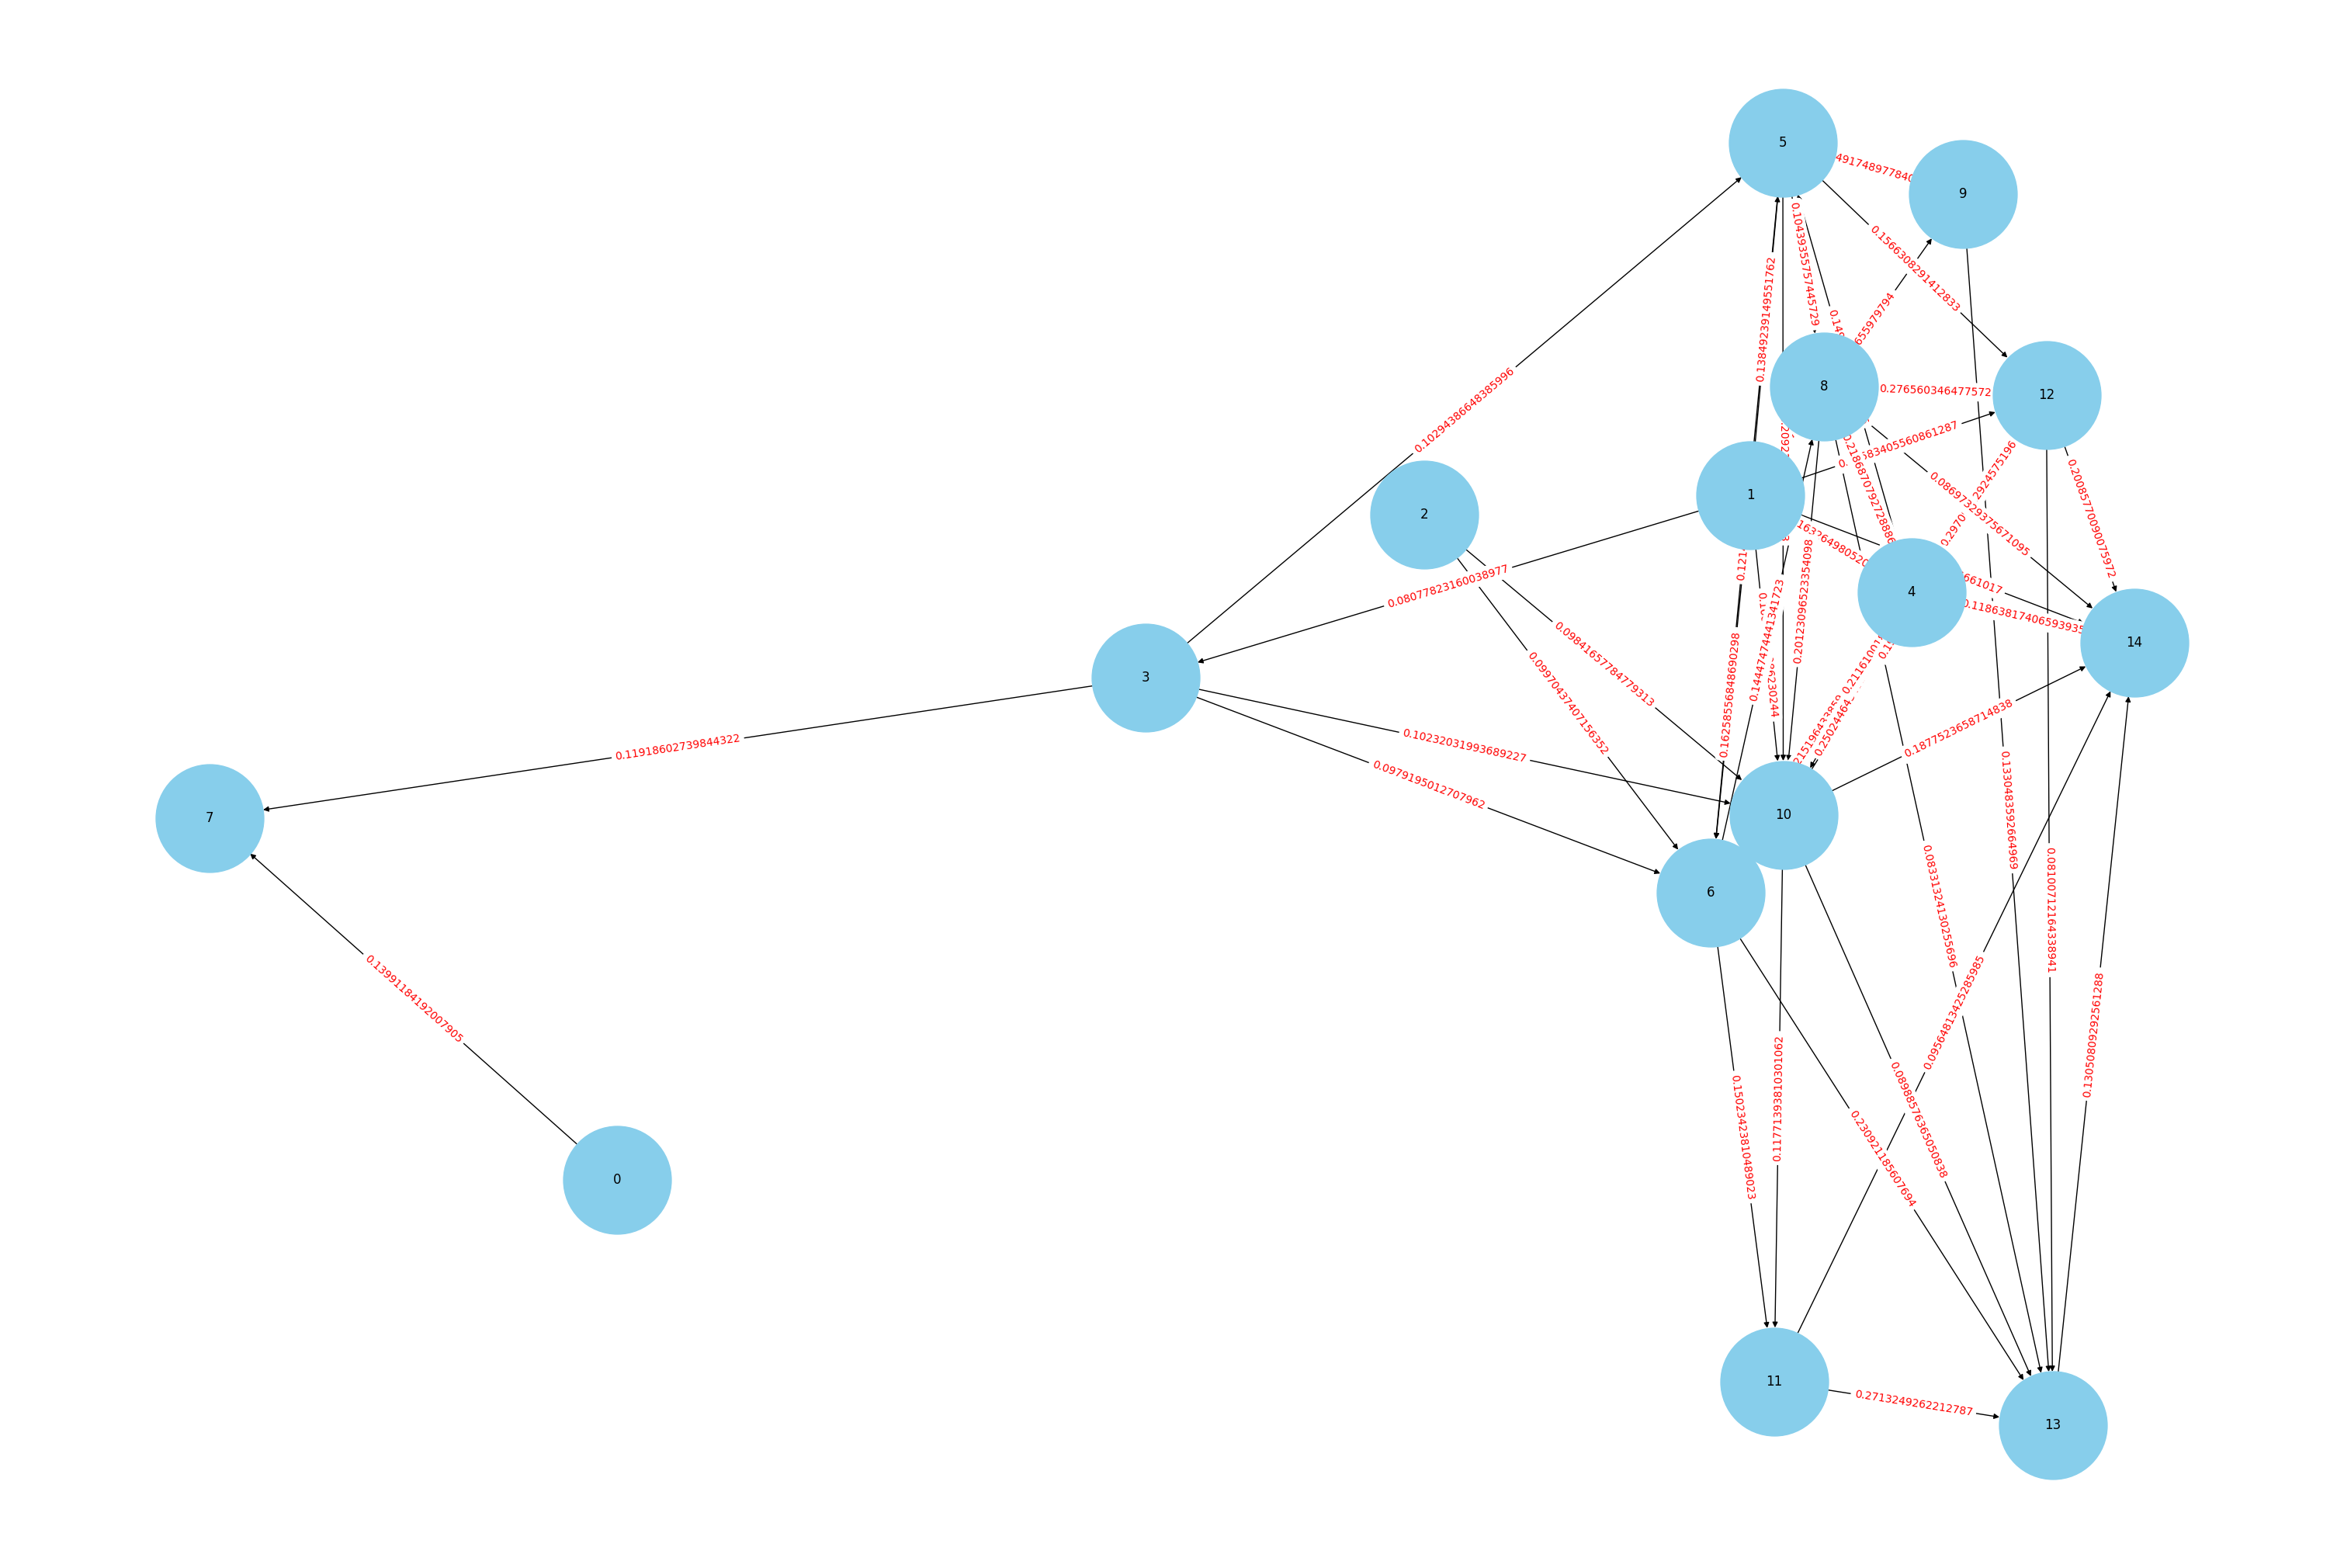

In [45]:
for i in range(len(graf_result[:4])):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # Menentukan ukuran canvas
  plt.figure(figsize=(30, 20))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  plt.show()


  print('\n')

Summary
- "Summary" atau "ringkasan" merujuk pada representasi singkat dari suatu teks, dokumen, atau informasi yang mencakup poin-poin utama atau esensial dari materi tersebut. Tujuan dari pembuatan summary adalah untuk menyajikan informasi penting dalam format yang lebih singkat dan lebih mudah dipahami daripada teks aslinya.

In [46]:
summary = [] #membuat array kosong untuk hasil summary
for i in range(len(graf_result)): #perulangan setiap graf result

  cc = nx.closeness_centrality(graf_result[i]) #menjadikan closeness centrality pada setiap indeks graf result
  cc = dict(sorted(cc.items(), key=lambda item: item[1], reverse=True)) #mengurutkan hasil closness centrality dari yang value terbesar

  lists = list(cc.keys())[:3] #mengambil indeks 3 kalimat teratas
  # print(cc)
  # print(lists)
  current_summary = [] #menyimpan hasil summary sementara

  for key,value in cc.items():
    # print((data['tokenizing'][i][key]))
    current_summary.append(data['tokenizing'][i][key]) #menambahkan hasil summary setiap kalimat
  summary.append(current_summary) #menambahkan hasil summary setiap dokumen

In [47]:
# ========== menyimpan summary yang telah diambil ==============

summary_result = [] #membuat list kosong untuk menyimpan hasil summary final
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = " ".join(ex_summary) #menggabungkan setiap kalimat yang ada pada dokumen
  summary_result.append(hasil) #menambahkan ke dalam final summary

In [48]:
summary_result

['baca juga 11 macam penyakit pada sistem reproduksi pria disari dari nursing times dan msd manuals, berikut penuaan sistem reproduksi wanita yang berkembang seiring bertambahnya usia seiring bertambahnya usia wanita, terjadi penurunan progresif dalam jumlah folikel ovarium. penuaan pada wanita dikaitkan dengan hilangnya elastisitas dan penyusutan panjang vagina. jumlah dan kualitas sel telur berkurang serta produksi estrogen menurun, yang pada sebagian besar wanita memicu menopause sekitar usia 51 tahun. setelah menopause, jaringan labia minora yang mengelilingi lubang vagina dan uretra, klitoris, vagina, dan uretra menjadi tipis atrofi. mengutip msd manuals, perubahan organ reproduksi wanita terjadi dengan cepat menjelang menopause. kecepatan penuaan ovarium terutama ditentukan oleh genetika, meskipun stres oksidatif, apoptosis, dan faktor lingkungan juga berperan. para pria tidak mengalami perubahan kesuburan yang besar dan cepat seiring bertambahnya usia, seperti wanita yang mengal

Menyimpan data

In [49]:
datassummary = []
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = " ".join(ex_summary)
  datassummary.append({
      'Summary':hasil,
      'Category':data['Category'][i]
  })

In [51]:
# Menyimpan data dalam bentuk CSV
import csv
csv_filename = 'hasil summary.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Summary', 'Category']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datassummary:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

Data telah disimpan dalam file hasil summary.csv


Load data summary

In [52]:
datasummary = pd.read_csv("/content/hasil summary.csv")
datasummary

Summary Category
0    baca juga 11 macam penyakit pada sistem reprod...   Health
1    baca juga 17 ciriciri ibu hamil kekurangan asa...   Health
2    mengetahui batas aman konsumsi alkohol sesuai ...   Health
3    gejala sifilis tiap stadium yang muncul juga d...   Health
4    hindari pemakaian bedak bayi, pelembab berminy...   Health
..                                                 ...      ...
805  dengan cara kerja ini, misalnya, salah satu pr...    Tekno
806  teknisi komputer akan membantu anda menghapus ...    Tekno
807  beberapa startup yang mendapatkan pendanaan di...    Tekno
808  baca juga serupa tapi tak sama, ini beda colok...    Tekno
809  spesifikasi lainnya dari phantom v flip 5g di ...    Tekno

[810 rows x 2 columns]

Cleaning


In [53]:
# recruitments punctuation
import string

# membuat kolom baru dengan nama Summary untuk data baru yang dipunctuation
datasummary['summary_clean'] = datasummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()

# Menghilangkan angka dari kolom 'Summary'
datasummary['summary_clean'] = datasummary['summary_clean'].str.replace('\d+', '', regex=True)
datasummary

<ipython-input-53-e9095bfa76de>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  datasummary['summary_clean'] = datasummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()


Summary Category  \
0    baca juga 11 macam penyakit pada sistem reprod...   Health   
1    baca juga 17 ciriciri ibu hamil kekurangan asa...   Health   
2    mengetahui batas aman konsumsi alkohol sesuai ...   Health   
3    gejala sifilis tiap stadium yang muncul juga d...   Health   
4    hindari pemakaian bedak bayi, pelembab berminy...   Health   
..                                                 ...      ...   
805  dengan cara kerja ini, misalnya, salah satu pr...    Tekno   
806  teknisi komputer akan membantu anda menghapus ...    Tekno   
807  beberapa startup yang mendapatkan pendanaan di...    Tekno   
808  baca juga serupa tapi tak sama, ini beda colok...    Tekno   
809  spesifikasi lainnya dari phantom v flip 5g di ...    Tekno   

                                         summary_clean  
0    baca juga  macam penyakit pada sistem reproduk...  
1    baca juga  ciriciri ibu hamil kekurangan asam ...  
2    mengetahui batas aman konsumsi alkohol sesuai ...  
3    gejala sifilis tiap stadium yang muncul juga d...  
4    hindari pemakaian bedak bayi pelembab berminya...  
..                                                 ...  
805  dengan cara kerja ini misalnya salah satu prog...  
806  teknisi komputer akan membantu anda menghapus ...  
807  beberapa startup yang mendapatkan pendanaan di...  
808  baca juga serupa tapi tak sama ini beda coloka...  
809  spesifikasi lainnya dari phantom v flip g di i...  

[810 rows x 3 columns]

Stopword
- Stopword merujuk pada kata-kata yang sering diabaikan atau dihilangkan saat melakukan tokenisasi dan menganalisis teks karena kehadirannya yang umum dan minim kontribusi signifikan terhadap makna teks. Jenis kata ini biasanya mencakup kata penghubung, kata depan, kata ganti, dan kata-kata lain yang umum digunakan dalam suatu bahasa. contoh kata "yang", "di", "ke", dll.

Library yang digunakan

In [54]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Abstrak'
for stop_word in stop_words:
  datasummary['summary_stopwords'] = datasummary['summary_clean'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string

datasummary

Summary Category  \
0    baca juga 11 macam penyakit pada sistem reprod...   Health   
1    baca juga 17 ciriciri ibu hamil kekurangan asa...   Health   
2    mengetahui batas aman konsumsi alkohol sesuai ...   Health   
3    gejala sifilis tiap stadium yang muncul juga d...   Health   
4    hindari pemakaian bedak bayi, pelembab berminy...   Health   
..                                                 ...      ...   
805  dengan cara kerja ini, misalnya, salah satu pr...    Tekno   
806  teknisi komputer akan membantu anda menghapus ...    Tekno   
807  beberapa startup yang mendapatkan pendanaan di...    Tekno   
808  baca juga serupa tapi tak sama, ini beda colok...    Tekno   
809  spesifikasi lainnya dari phantom v flip 5g di ...    Tekno   

                                         summary_clean  \
0    baca juga  macam penyakit pada sistem reproduk...   
1    baca juga  ciriciri ibu hamil kekurangan asam ...   
2    mengetahui batas aman konsumsi alkohol sesuai ...   
3    gejala sifilis tiap stadium yang muncul juga d...   
4    hindari pemakaian bedak bayi pelembab berminya...   
..                                                 ...   
805  dengan cara kerja ini misalnya salah satu prog...   
806  teknisi komputer akan membantu anda menghapus ...   
807  beberapa startup yang mendapatkan pendanaan di...   
808  baca juga serupa tapi tak sama ini beda coloka...   
809  spesifikasi lainnya dari phantom v flip g di i...   

                                     summary_stopwords  
0    baca juga  macam penyakit pada sistem reproduk...  
1    baca juga  ciriciri ibu hamil kekurangan asam ...  
2    mengetahui batas aman konsumsi alkohol sesuai ...  
3    gejala sifilis tiap stadium yang muncul juga d...  
4    hindari pemakaian bedak bayi pelembab berminya...  
..                                                 ...  
805  dengan cara kerja ini misalnya salah satu prog...  
806  teknisi komputer akan membantu anda menghapus ...  
807  beberapa startup yang mendapatkan pendanaan di...  
808  baca juga serupa tapi tak sama ini beda coloka...  
809  spesifikasi lainnya dari phantom v flip g di i...  

[810 rows x 4 columns]

Tokenizing


In [58]:
# Pastikan setiap nilai di kolom 'summary_stopwords' adalah string
datasummary['summary_stopwords'] = datasummary['summary_stopwords'].astype(str)

# Terapkan word_tokenize setelah memastikan bahwa semua nilainya adalah string
datasummary['summary_tokens'] = datasummary['summary_stopwords'].apply(word_tokenize)
datasummary

Summary Category  \
0    baca juga 11 macam penyakit pada sistem reprod...   Health   
1    baca juga 17 ciriciri ibu hamil kekurangan asa...   Health   
2    mengetahui batas aman konsumsi alkohol sesuai ...   Health   
3    gejala sifilis tiap stadium yang muncul juga d...   Health   
4    hindari pemakaian bedak bayi, pelembab berminy...   Health   
..                                                 ...      ...   
805  dengan cara kerja ini, misalnya, salah satu pr...    Tekno   
806  teknisi komputer akan membantu anda menghapus ...    Tekno   
807  beberapa startup yang mendapatkan pendanaan di...    Tekno   
808  baca juga serupa tapi tak sama, ini beda colok...    Tekno   
809  spesifikasi lainnya dari phantom v flip 5g di ...    Tekno   

                                         summary_clean  \
0    baca juga  macam penyakit pada sistem reproduk...   
1    baca juga  ciriciri ibu hamil kekurangan asam ...   
2    mengetahui batas aman konsumsi alkohol sesuai ...   
3    gejala sifilis tiap stadium yang muncul juga d...   
4    hindari pemakaian bedak bayi pelembab berminya...   
..                                                 ...   
805  dengan cara kerja ini misalnya salah satu prog...   
806  teknisi komputer akan membantu anda menghapus ...   
807  beberapa startup yang mendapatkan pendanaan di...   
808  baca juga serupa tapi tak sama ini beda coloka...   
809  spesifikasi lainnya dari phantom v flip g di i...   

                                     summary_stopwords  \
0    baca juga  macam penyakit pada sistem reproduk...   
1    baca juga  ciriciri ibu hamil kekurangan asam ...   
2    mengetahui batas aman konsumsi alkohol sesuai ...   
3    gejala sifilis tiap stadium yang muncul juga d...   
4    hindari pemakaian bedak bayi pelembab berminya...   
..                                                 ...   
805  dengan cara kerja ini misalnya salah satu prog...   
806  teknisi komputer akan membantu anda menghapus ...   
807  beberapa startup yang mendapatkan pendanaan di...   
808  baca juga serupa tapi tak sama ini beda coloka...   
809  spesifikasi lainnya dari phantom v flip g di i...   

                                        summary_tokens  
0    [baca, juga, macam, penyakit, pada, sistem, re...  
1    [baca, juga, ciriciri, ibu, hamil, kekurangan,...  
2    [mengetahui, batas, aman, konsumsi, alkohol, s...  
3    [gejala, sifilis, tiap, stadium, yang, muncul,...  
4    [hindari, pemakaian, bedak, bayi, pelembab, be...  
..                                                 ...  
805  [dengan, cara, kerja, ini, misalnya, salah, sa...  
806  [teknisi, komputer, akan, membantu, anda, meng...  
807  [beberapa, startup, yang, mendapatkan, pendana...  
808  [baca, juga, serupa, tapi, tak, sama, ini, bed...  
809  [spesifikasi, lainnya, dari, phantom, v, flip,...  

[810 rows x 5 columns]

Merubah posisi kolom sesuai keinginan

In [59]:
# merubah posisi kolom
datasummary = datasummary[['Summary', 'summary_clean', 'summary_stopwords',
            'summary_tokens','Category']]

In [60]:
datasummary

Summary  \
0    baca juga 11 macam penyakit pada sistem reprod...   
1    baca juga 17 ciriciri ibu hamil kekurangan asa...   
2    mengetahui batas aman konsumsi alkohol sesuai ...   
3    gejala sifilis tiap stadium yang muncul juga d...   
4    hindari pemakaian bedak bayi, pelembab berminy...   
..                                                 ...   
805  dengan cara kerja ini, misalnya, salah satu pr...   
806  teknisi komputer akan membantu anda menghapus ...   
807  beberapa startup yang mendapatkan pendanaan di...   
808  baca juga serupa tapi tak sama, ini beda colok...   
809  spesifikasi lainnya dari phantom v flip 5g di ...   

                                         summary_clean  \
0    baca juga  macam penyakit pada sistem reproduk...   
1    baca juga  ciriciri ibu hamil kekurangan asam ...   
2    mengetahui batas aman konsumsi alkohol sesuai ...   
3    gejala sifilis tiap stadium yang muncul juga d...   
4    hindari pemakaian bedak bayi pelembab berminya...   
..                                                 ...   
805  dengan cara kerja ini misalnya salah satu prog...   
806  teknisi komputer akan membantu anda menghapus ...   
807  beberapa startup yang mendapatkan pendanaan di...   
808  baca juga serupa tapi tak sama ini beda coloka...   
809  spesifikasi lainnya dari phantom v flip g di i...   

                                     summary_stopwords  \
0    baca juga  macam penyakit pada sistem reproduk...   
1    baca juga  ciriciri ibu hamil kekurangan asam ...   
2    mengetahui batas aman konsumsi alkohol sesuai ...   
3    gejala sifilis tiap stadium yang muncul juga d...   
4    hindari pemakaian bedak bayi pelembab berminya...   
..                                                 ...   
805  dengan cara kerja ini misalnya salah satu prog...   
806  teknisi komputer akan membantu anda menghapus ...   
807  beberapa startup yang mendapatkan pendanaan di...   
808  baca juga serupa tapi tak sama ini beda coloka...   
809  spesifikasi lainnya dari phantom v flip g di i...   

                                        summary_tokens Category  
0    [baca, juga, macam, penyakit, pada, sistem, re...   Health  
1    [baca, juga, ciriciri, ibu, hamil, kekurangan,...   Health  
2    [mengetahui, batas, aman, konsumsi, alkohol, s...   Health  
3    [gejala, sifilis, tiap, stadium, yang, muncul,...   Health  
4    [hindari, pemakaian, bedak, bayi, pelembab, be...   Health  
..                                                 ...      ...  
805  [dengan, cara, kerja, ini, misalnya, salah, sa...    Tekno  
806  [teknisi, komputer, akan, membantu, anda, meng...    Tekno  
807  [beberapa, startup, yang, mendapatkan, pendana...    Tekno  
808  [baca, juga, serupa, tapi, tak, sama, ini, bed...    Tekno  
809  [spesifikasi, lainnya, dari, phantom, v, flip,...    Tekno  

[810 rows x 5 columns]

In [62]:
# menggabungkan kata
datasummary['summary_final'] = datasummary['summary_tokens'].apply(lambda x: ' '.join(x))

<ipython-input-62-9538fca829d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasummary['summary_final'] = datasummary['summary_tokens'].apply(lambda x: ' '.join(x))


TF-IDF

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
tfidf_matrix = tfidf_vectorizer.fit_transform(datasummary['summary_final'])

# Membuat DataFrame dari hasil TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
tfidf_df = pd.concat([datasummary['Summary'],tfidf_df,datasummary['Category']],axis=1)
# Cetak DataFrame TF-IDF
tfidf_df

Summary    0    1    2    3  \
0    baca juga 11 macam penyakit pada sistem reprod...  0.0  0.0  0.0  0.0   
1    baca juga 17 ciriciri ibu hamil kekurangan asa...  0.0  0.0  0.0  0.0   
2    mengetahui batas aman konsumsi alkohol sesuai ...  0.0  0.0  0.0  0.0   
3    gejala sifilis tiap stadium yang muncul juga d...  0.0  0.0  0.0  0.0   
4    hindari pemakaian bedak bayi, pelembab berminy...  0.0  0.0  0.0  0.0   
..                                                 ...  ...  ...  ...  ...   
805  dengan cara kerja ini, misalnya, salah satu pr...  0.0  0.0  0.0  0.0   
806  teknisi komputer akan membantu anda menghapus ...  0.0  0.0  0.0  0.0   
807  beberapa startup yang mendapatkan pendanaan di...  0.0  0.0  0.0  0.0   
808  baca juga serupa tapi tak sama, ini beda colok...  0.0  0.0  0.0  0.0   
809  spesifikasi lainnya dari phantom v flip 5g di ...  0.0  0.0  0.0  0.0   

       4    5    6    7    8  ...  16059  16060  16061  16062  16063  16064  \
0    0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
..   ...  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...   
805  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
806  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
807  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
808  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
809  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   

     16065  16066  16067  Category  
0      0.0    0.0    0.0    Health  
1      0.0    0.0    0.0    Health  
2      0.0    0.0    0.0    Health  
3      0.0    0.0    0.0    Health  
4      0.0    0.0    0.0    Health  
..     ...    ...    ...       ...  
805    0.0    0.0    0.0     Tekno  
806    0.0    0.0    0.0     Tekno  
807    0.0    0.0    0.0     Tekno  
808    0.0    0.0    0.0     Tekno  
809    0.0    0.0    0.0     Tekno  

[810 rows x 16070 columns]

Modelling

Membagi data menjadi data latih dan data uji

In [64]:
# import library
from sklearn.model_selection import train_test_split

# Bagi data menjadi pelatihan (80%) dan pengujian (20%)
X_tfidf = tfidf_df.iloc[:,1:-1]
# X_tfidf
y_tfidf = tfidf_df["Category"]
# y_tfidf
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

Library yang dibutuhkan untuk menentukan hasil akurasi

In [67]:
# Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

Random Forest adalah algoritma machine learning yang menggabungkan keluaran dari beberapa decision tree untuk mencapai satu hasil.

In [68]:
# Inisialisasi model Naive Bayes
rf = RandomForestClassifier()

# Latih model pada kolom topik tertentu
rf.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred = rf.predict(X_tfidf_test)

accuracy_rf = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Random Forest: {accuracy_rf}')

Akurasi model Random Forest: 0.9814814814814815


Visualisasi

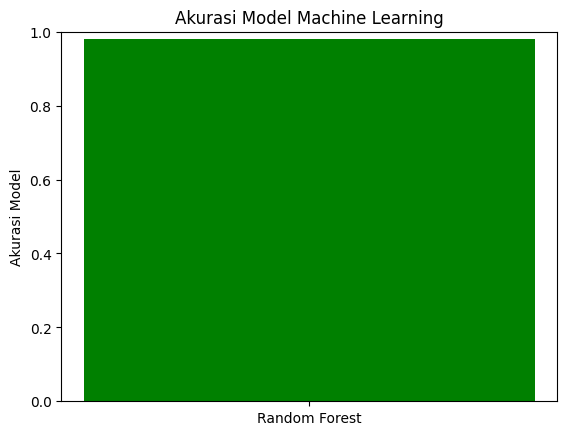

In [70]:
import matplotlib.pyplot as plt

models = ['Random Forest']
accuracies = [accuracy_rf]

plt.bar(models, accuracies, color=[ 'green'])
plt.ylabel('Akurasi Model')
plt.title('Akurasi Model Machine Learning')
plt.ylim(0, 1)  # Sesuaikan dengan rentang akurasi (0-1)
plt.show()